In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Vilket dataset är bäst?
Vi börjar med att kika på vilket dataset som är lämpligast att träna vår modell med.

In [3]:
data1 = pd.read_csv("random_data.csv")
data2 = pd.read_csv("random_data_2.csv")
data3 = pd.read_csv("random_data_3.csv")

In [4]:
print(len(data1), len(data2), len(data3))

1000 1000 1000


Alla dataset har samma antal datapunkter.

# Vi tittar på värderna

In [5]:
data1.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.00000
mean,-0.012506,-0.021365,0.50000
std,1.195156,1.155874,0.50025
min,-3.650544,-3.187975,0.00000
25%,-1.049857,-1.032517,0.00000
50%,0.468185,0.127183,0.50000
75%,1.003231,0.963168,1.00000
max,1.992686,2.372060,1.00000


In [6]:
data2.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.000000
mean,0.020940,-0.011339,0.496000
std,1.166321,1.156151,0.500234
min,-2.972555,-3.187975,0.000000
25%,-0.950602,-1.006720,0.000000
50%,0.478692,0.236545,0.000000
75%,1.001860,0.954061,1.000000
max,1.992686,2.344732,1.000000


In [7]:
data3.describe()

,Unnamed: 0,feature_1,feature_2,target
count,1000.000000,950.000000,951.000000,1000.00000
mean,499.500000,-0.016061,-0.011498,0.50000
std,288.819436,1.203023,1.161757,0.50025
min,0.000000,-3.650544,-3.187975,0.00000
25%,249.750000,-1.058225,-1.026506,0.00000
50%,499.500000,0.474490,0.144929,0.50000
75%,749.250000,1.003046,0.974699,1.00000
max,999.000000,1.992686,2.372060,1.00000


Från vad vi kan se här så är dataset 1 och 2 ganska lika. Dataset 3 aviker dock från resten eftersom att det saknas en massa värden. Dataset 3 verkar även ha en namnlös kolumn för index som vi inte har någon användning av. Vi kan utesluta det setet och kolla vilket av dataset 1 och 2 som är lämpligast.

# Vi kollar efter dubbletter

In [8]:
data1.duplicated().sum()

0

In [9]:
data2.duplicated().sum()

500

Dataset 2 innehåller 500 dubletter... Verkar som dataset 1 blir lämpligast.

# Plottning!

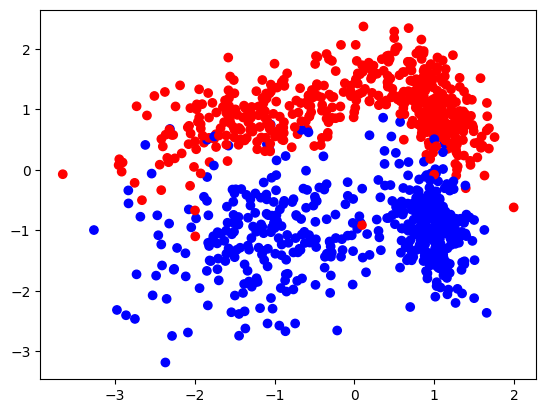

In [10]:
plt.scatter(data1["feature_1"], data1["feature_2"], c=data1["target"], cmap='bwr')
plt.show()

Det blir svårt att klassifisera dom här datapunkterna då de ibland kränker varandras luftrumm. För att klassifisera datapunkterna nogrant så kommer vi att öka antalet dimensioner på datan.

# Vi tränar en SVM!

In [53]:
# Splitta datan
X = data1.iloc[:, :2]
y = data1["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Träna vår SVN
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
plt.show()

# Hur bra är vår modell?
y_pred = svc.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print(test_score)

0.985


# Testscore med olika kernels

In [54]:
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
for k in kernels:
    svc_test = SVC(kernel=k)
    svc_test.fit(X_train, y_train)

    y_pred = svc_test.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)

    print(k, test_score)

linear 0.985
poly 0.98
rbf 0.995
sigmoid 0.95


# Plotta hyperplan

In [55]:
# Räkna ut lutningen på planet
coefs = svc.coef_[0]
k = -coefs[0] / coefs[1]

# Ta fram förskjutningen för planet
m = svc.intercept_[0]

# Skapa linjen
line_x = np.linspace(-4, 2.5)
line_y = k*line_x + m

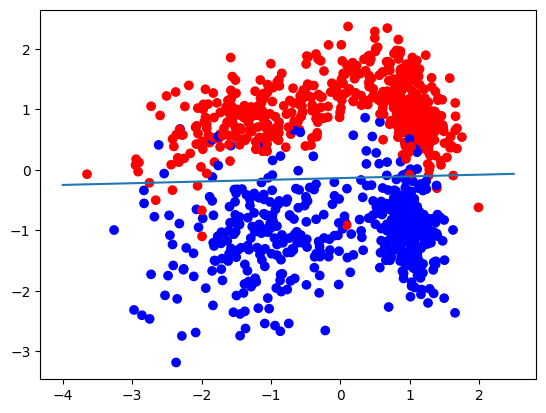

In [58]:
# Förra plotten, fast med hyperplanet inkluderat
plt.scatter(data1["feature_1"], data1["feature_2"], c=data1["target"], cmap='bwr')
plt.plot(line_x, line_y)
plt.show()

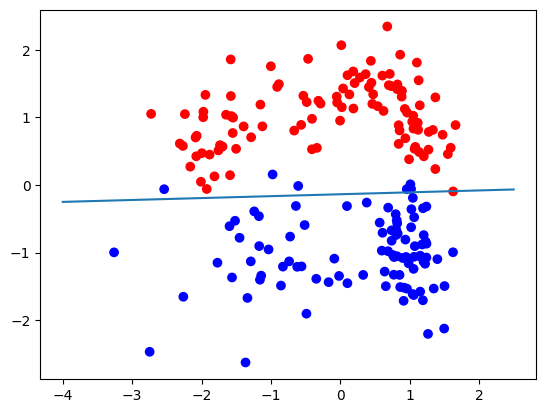

In [59]:
# Hyperplanet med testdatan
plt.scatter(X_test["feature_1"], X_test["feature_2"], c=y_test, cmap='bwr')
plt.plot(line_x, line_y)
plt.show()